In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("homeprices.csv")

In [3]:
df

,towns,area,price
0,monroe township,3000,565000
1,monroe township,3200,610000
2,west windsor,2600,585000
3,west windsor,2800,615000
4,west windsor,3300,650000
5,robinsville,2600,575000
6,robinsville,2900,600000
7,robinsville,3100,620000
8,robinsville,3100,620000


In [4]:
from sklearn.preprocessing import LabelEncoder 

In [5]:
towns=LabelEncoder()
df['towns']=towns.fit_transform(df['towns'])

In [6]:
df

,towns,area,price
0,0,3000,565000
1,0,3200,610000
2,2,2600,585000
3,2,2800,615000
4,2,3300,650000
5,1,2600,575000
6,1,2900,600000
7,1,3100,620000
8,1,3100,620000


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[["towns","area"]],df.price,test_size=0.2)

In [8]:
x_train

,towns,area
4,2,3300
3,2,2800
6,1,2900
0,0,3000
7,1,3100
8,1,3100
5,1,2600


In [9]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_x = sx.fit_transform(df.drop('price',axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

scaled_x

array([[0.        , 0.57142857],
       [0.        , 0.85714286],
       [1.        , 0.        ],
       [1.        , 0.28571429],
       [1.        , 1.        ],
       [0.5       , 0.        ],
       [0.5       , 0.42857143],
       [0.5       , 0.71428571],
       [0.5       , 0.71428571]])

In [10]:
scaled_y

array([[0.        ],
       [0.52941176],
       [0.23529412],
       [0.58823529],
       [1.        ],
       [0.11764706],
       [0.41176471],
       [0.64705882],
       [0.64705882]])

# 1. Batch Gradient  Descent 

In [11]:
# Batch gradient descent 

def batch_gradient_descent(x, y_true, epochs, learning_rate = 0.01):

    number_of_features = x.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 2 (area, bedroom)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = x.shape[0] # number of rows in X
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):        
        y_predicted = np.dot(w, x.T) + b

        w_grad = -(2/total_samples)*(x.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

(array([0.63320257, 0.82056961]), -0.3095576428498715, 0.010464552591642147)

In [12]:
w,b,cost

(array([0.63320257, 0.82056961]), -0.3095576428498715, 0.010464552591642147)

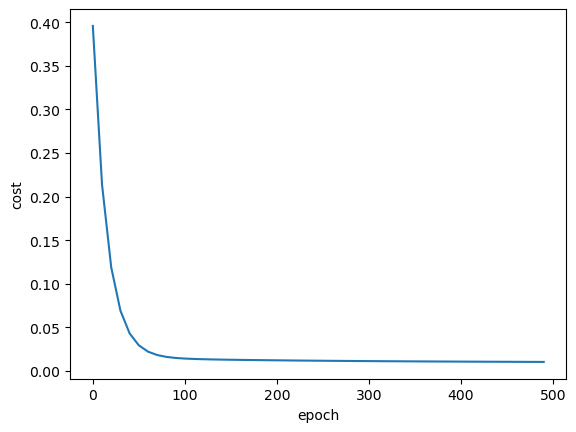

In [13]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [14]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2,2600,w,b)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


592509.8188994328

# 2. Stochastic Gradient Descent 

In [15]:
# Stochastic Gradient descent 

import random
random.randint(0,6)

3

In [16]:
def stochastic_gradient_descent(x, y_true, epochs, learning_rate = 0.01):
 
    number_of_features = x.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = x.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = x[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd =stochastic_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.5737795 , 0.79632237]), -0.2622074018198767, 0.0021111937551951117)

In [17]:
w,b

(array([0.63320257, 0.82056961]), -0.3095576428498715)

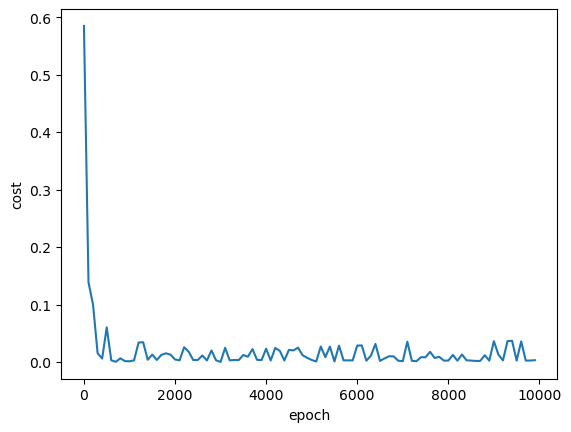

In [18]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [19]:
predict(1,2600,w_sgd, b_sgd) 

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


567097.9997860421

In [20]:
predict(1,3100,w_sgd, b_sgd) 

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


615446.1433939371

In [21]:
predict(1,2900,w_sgd,b_sgd)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


596106.8859507792

# 3. Mini Batch Gradient Descent 

In [22]:
np.random.permutation(10)

array([7, 6, 2, 4, 8, 0, 9, 1, 5, 3])

In [23]:
# Mini Batch Gradient Descent 

def mini_batch_gradient_descent(x, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):
    
    number_of_features = x.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = x.shape[0] # number of rows in X
    
    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples
        
    cost_list = []
    epoch_list = []
    
    num_batches = int(total_samples/batch_size)
    
    for i in range(epochs):    
        random_indices = np.random.permutation(total_samples)
        x_tmp = x[random_indices]
        y_tmp = y_true[random_indices]
        
        for j in range(0,total_samples,batch_size):
            xj = x_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, xj.T) + b
            
            w_grad = -(2/len(xj))*(xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(xj))*np.sum(yj-y_predicted)
            
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
                
            cost = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(
    scaled_x,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs = 120,
    batch_size = 5
)
w, b, cost

(array([0.68501994, 0.82077535]), -0.34044547609147463, 0.018797769406367664)

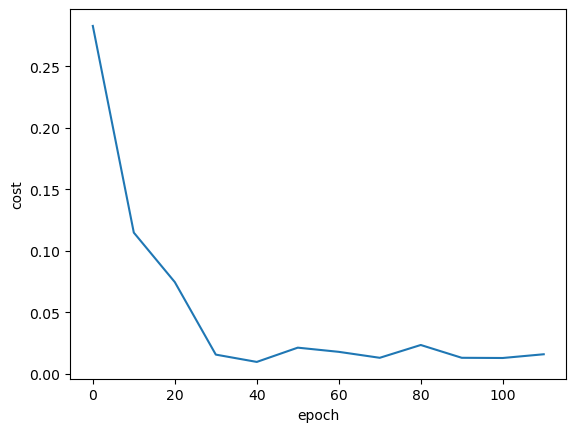

In [24]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [25]:
predict(2,2600,w,b)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


594288.829698253